In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import metrics

In [7]:
data=pd.read_csv('https://gist.githubusercontent.com/bigsnarfdude/515849391ad37fe593997fe0db98afaa/raw/f663366d17b7d05de61a145bbce7b2b961b3b07f/weather.csv')
data

,outlook,temperature,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes
4,rainy,mild,high,False,yes
5,rainy,cool,normal,False,yes
6,rainy,cool,normal,True,no
7,rainy,mild,normal,False,yes
8,rainy,mild,high,True,no
9,sunny,hot,high,False,no


In [10]:
le = LabelEncoder()
data['outlook'] = le.fit_transform(data['outlook'])
data['temperature'] = le.fit_transform(data['temperature'])
data['humidity'] = le.fit_transform(data['humidity'])
data['windy'] = le.fit_transform(data['windy'])
data['play']=le.fit_transform(data['play'])
data

,outlook,temperature,humidity,windy,play
0,0,1,0,0,1
1,0,0,1,1,1
2,0,2,0,1,1
3,0,1,1,0,1
4,1,2,0,0,1
5,1,0,1,0,1
6,1,0,1,1,0
7,1,2,1,0,1
8,1,2,0,1,0
9,2,1,0,0,0


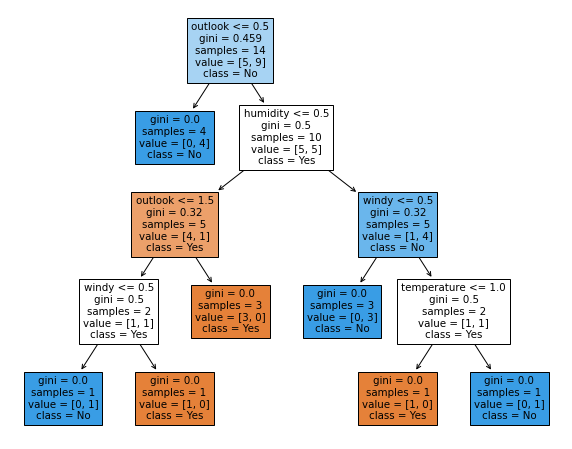

In [17]:
X=data[['outlook', 'temperature', 'humidity', 'windy']]
Y=data['play']
model = DecisionTreeClassifier(criterion='gini')
model.fit(X,Y)
plt.figure(figsize=(10,8))
tree.plot_tree(model, filled=True, feature_names=['outlook', 'temperature', 'humidity', 'windy'], class_names=['Yes', 'No'])
plt.show()

(14, 1)
(14, 2)


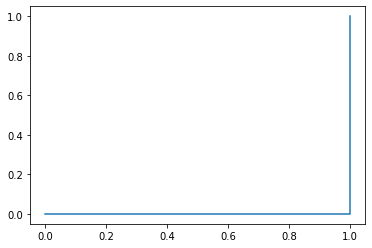

In [33]:
Y=Y.reshape(-1,1)
print(Y.shape)
yscore=model.predict_proba(X)
print(yscore.shape)
FPRs, TPRs, _ =metrics.roc_curve(y_true=Y, y_score=yscore[:,0])
plt.plot(FPRs, TPRs)
plt.show()